**Autoencoder as denoiser**

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('mnist_train.csv')

In [4]:
#Extract first 10k samples
data = np.array(data)
data = data[0:10000,:] # Extracting first 10000 samples
data.shape

(10000, 785)

In [5]:
# Data without labels because Unsupervised learning
data = data[:,1:]

# Data Normalization
dataN = data / np.max(data)

# Converting to pytorch tensor
dataT = torch.tensor( dataN, dtype = torch.float32)

In [8]:
#Creating the AutoEncoder
class AE_Model(nn.Module):
  def __init__(self):
    super().__init__()

    self.input = nn.Linear(784,256) # 28x28
    self.encoder = nn.Linear(256,64)
    self.latent = nn.Linear(64,256)
    self.decoder = nn.Linear(256,784)

  def forward(self,x):
    x = F.relu(self.input(x))
    x = F.relu(self.encoder(x))
    x = F.relu(self.latent(x))
    y = torch.sigmoid(self.decoder(x)) # We are using the sigmoid activation function to normalise the data, so that its in the same range [0,1] as the black and white image

    return y

In [9]:
#Create model, set parameters
model = AE_Model()

lossfunc = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(),lr=.001)

In [10]:
 random_idx = np.random.choice(dataT.shape[0], size=32)
 random_idx

array([ 126, 4684, 8249, 6375, 6498, 7900, 1902, 9705, 5427, 9156,  145,
       4423, 4051,  113, 8794, 7610, 3285, 6969, 3773, 8917, 3876,   90,
       7991,   25, 8400, 6883, 3450, 1345, 7274, 2235, 9957,  671])

In [11]:
#Training the model
epochs = 10001

losses = torch.zeros(epochs)

for epoch in range(epochs):

  # Selecting a batchsize  of 32.

  random_idx = np.random.choice(dataT.shape[0], size=32)

  X = dataT[random_idx,:]
  ypred = model(X)
  loss = lossfunc(ypred,X) # Comparing predictions with the input data.

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  losses[epoch] = loss.item()

  if (epoch % 1000) == 0:

      print(f' epochs : {epoch}  loss : {loss : 2.2f}')

 epochs : 0  loss :  0.23
 epochs : 1000  loss :  0.01
 epochs : 2000  loss :  0.01
 epochs : 3000  loss :  0.01
 epochs : 4000  loss :  0.01
 epochs : 5000  loss :  0.01
 epochs : 6000  loss :  0.01
 epochs : 7000  loss :  0.01
 epochs : 8000  loss :  0.01
 epochs : 9000  loss :  0.01
 epochs : 10000  loss :  0.01


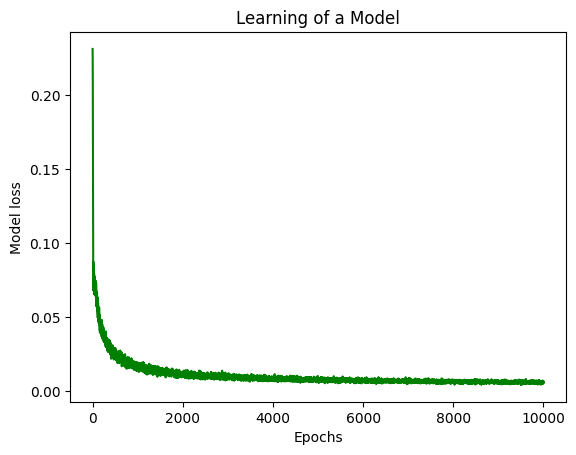

In [12]:
plt.plot(losses, color = 'g', ls = '-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('Learning of a Model')
plt.show()

In [ ]:
#Testing the model

In [13]:
X = dataT[:7,:]  # Extracting first seven samples
ypred = model(X)

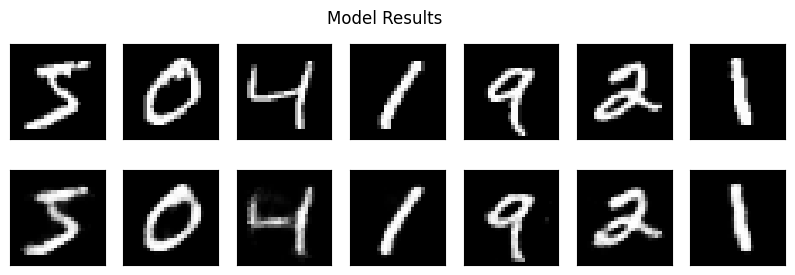

In [14]:
fig,axes = plt.subplots(2,7,figsize=(10,3))

for i in range(7):
  axes[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axes[1,i].imshow(ypred[i,:].view(28,28).detach() ,cmap='gray')
  axes[0,i].set_xticks([]), axes[0,i].set_yticks([])
  axes[1,i].set_xticks([]), axes[1,i].set_yticks([])

plt.suptitle('Model Results')
plt.show()

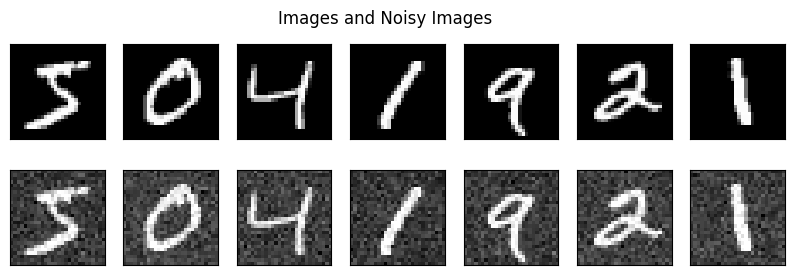

In [15]:
#Creating noisy images
X = dataT[:7,:] # Pick first 7 images

# Adding Gaussian Noise to the Images

Xnoise = X + 0.1 * torch.randn(X.shape)

Xnoise[Xnoise>1] = 1  # Values greater than one will clip to one.

fig,axes = plt.subplots(2,7,figsize=(10,3))

for i in range(7):
  axes[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axes[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axes[0,i].set_xticks([]), axes[0,i].set_yticks([])
  axes[1,i].set_xticks([]), axes[1,i].set_yticks([])
plt.suptitle('Images and Noisy Images')
plt.show()

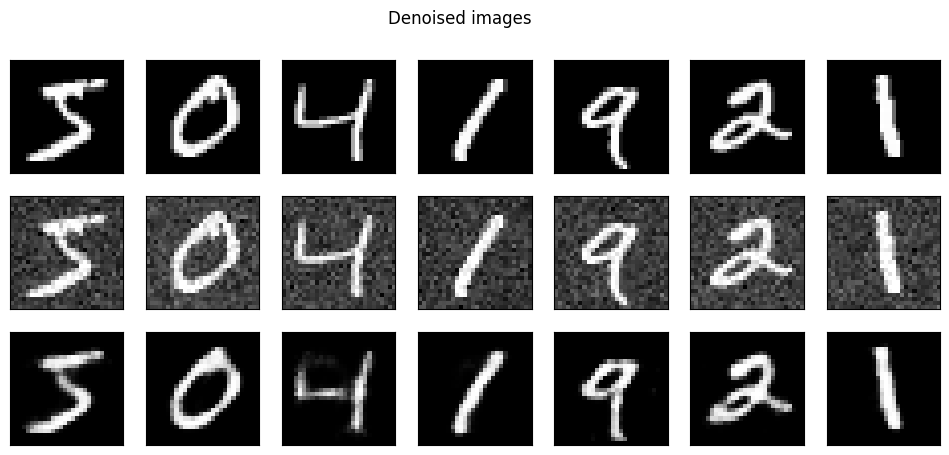

In [16]:
#Denoise
ypred_noise = model(Xnoise)

fig,axes = plt.subplots(3,7,figsize=(12,5))

for i in range(7):
  axes[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axes[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axes[2,i].imshow(ypred_noise[i,:].view(28,28).detach() ,cmap='gray')
  axes[0,i].set_xticks([]), axes[0,i].set_yticks([])
  axes[1,i].set_xticks([]), axes[1,i].set_yticks([])
  axes[2,i].set_xticks([]), axes[2,i].set_yticks([])

plt.suptitle('Denoised images')
plt.show()